# Week-24
Dataset Resource : [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
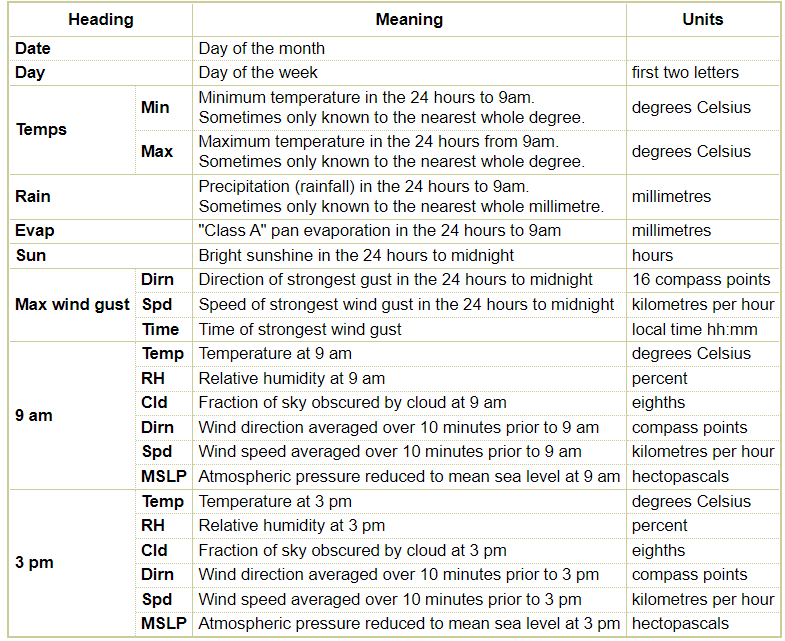

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import missingno as msno

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# sns.set(style='darkgrid')
# %matplotlib inline

In [2]:
data = pd.read_csv('weatherAUS.csv')
df=data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records,Percentage (%)
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


In [5]:
# import missingno as msno
# msno.matrix(df);

In [6]:
# msno.bar(df);

In [7]:
# msno.heatmap(df);

In [8]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df[['RainToday', 'RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [9]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (140787, 23)
___________________________
Data Types:
float64    16
object      7
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,73982,146,66805,0,14.5
Evaporation,float64,81093,356,59694,0,145
Cloud3pm,float64,84693,11,56094,0,9
Cloud9am,float64,88162,11,52625,0,9
Pressure3pm,float64,127018,549,13769,977.1,1039.6
Pressure9am,float64,127044,546,13743,980.5,1041
WindDir9am,object,131127,17,9660,NaN,NaN
WindGustDir,object,131624,17,9163,NaN,NaN
WindGustSpeed,float64,131682,68,9105,6,135
WindDir3pm,object,137117,17,3670,NaN,NaN


In [10]:
df[['RainToday','RainTomorrow']] = df[['RainToday','RainTomorrow']].replace({'Yes':1, 'No':0})

In [11]:
df = df.dropna()

### Make Feature Engineering

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Year'] = df['Date'].dt.year.astype('int16')
df['Month'] = df['Date'].dt.month.astype('int16')
df['Year_Month']=df['Date'].array.strftime('%Y-%m') # strftime works with array
df['DiffTemp']=df['MaxTemp']-df['MinTemp']
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Year_Month,DiffTemp
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,2.0,5.0,26.6,33.4,0,0,2009,1,2009-01,17.3
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1.0,1.0,20.3,27.0,0,0,2009,1,2009-01,10.5
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1.0,6.0,28.7,34.9,0,0,2009,1,2009-01,18.2
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1.0,5.0,29.1,35.6,0,0,2009,1,2009-01,16.5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1.0,6.0,33.6,37.6,0,0,2009,1,2009-01,16.8


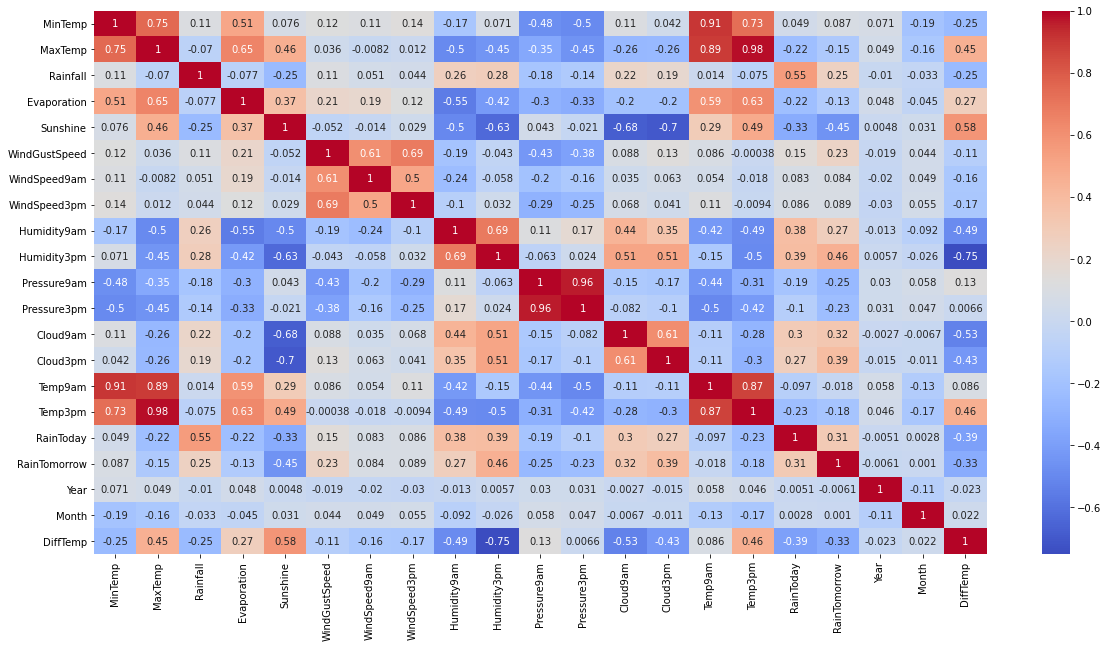

In [13]:
# for all variables 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

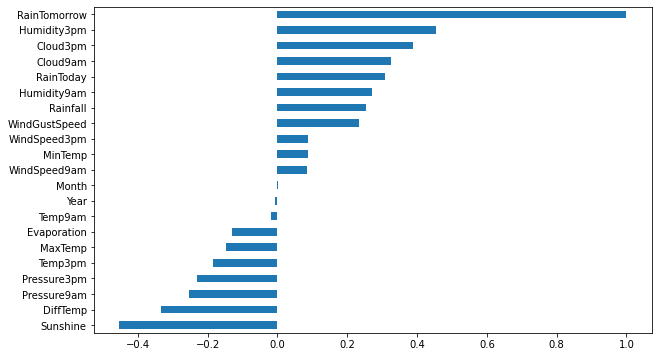

In [14]:
plt.figure(figsize=(10,6))
df.corr()["RainTomorrow"].sort_values().plot.barh();

We drop all but one of the features that are highly correlated with each other.

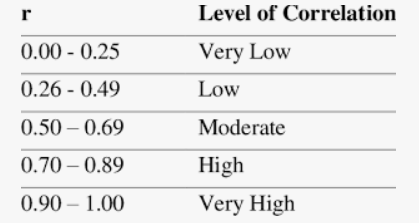

In [15]:
def corrank(X, threshold=0):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    df = df.sort_values(by='corr',ascending=False).reset_index(drop=True)
    return df[df['corr']>threshold]

# prints a descending list of correlation pair (Max on top)
corrank(df, 0.7)

,Feature1,Feature2,corr
0,MaxTemp,Temp3pm,0.984841
1,Pressure9am,Pressure3pm,0.961538
2,MinTemp,Temp9am,0.906295
3,MaxTemp,Temp9am,0.893387
4,Temp9am,Temp3pm,0.870620
5,Humidity3pm,DiffTemp,0.751022
6,MinTemp,MaxTemp,0.749687
7,MinTemp,Temp3pm,0.727222
8,Sunshine,Cloud3pm,0.702022


In [16]:
# df.groupby('Location')['RainTomorrow','RainToday'].agg(['mean'])

In [17]:
drop_list=[
            'Date', 
#             'Location', 
#             'MinTemp', 
#            'MaxTemp', 'Rainfall', 
#            'Evaporation',
#            'Sunshine', 
#            'WindGustDir', 
#            'WindGustSpeed', 
#            'WindDir9am', 'WindDir3pm',
#            'WindSpeed9am', 'WindSpeed3pm', 
#            'Humidity9am',
#            'Humidity3pm',
#            'Pressure9am', 
#            'Pressure3pm', 
#            'Cloud9am', 
#            'Cloud3pm', 
#            'Temp9am','Temp3pm', 
#            'RainToday', 
#            'RainTomorrow', 
           'Year', 'Year_Month',
#             'Month',
#        'DiffTemp',
          ]

In [18]:
df = df.drop(drop_list, axis=1)

In [19]:
df.isnull().any().sum()

0

## Outliers

### Isolation Forest
Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.
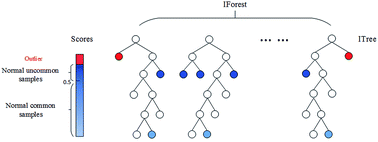

In [20]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'DiffTemp'],
      dtype='object')

In [21]:
df = pd.get_dummies(df, drop_first=True, columns = ['Location','WindGustDir','WindDir9am','WindDir3pm'])

In [22]:
summary(df)

Data shape: (56420, 90)
___________________________
Data Types:
uint8      70
float64    17
int64       2
int16       1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,56420,10,0,0.0,9.0
WindDir9am_SSW,uint8,56420,2,0,0.0,1.0
WindDir9am_SE,uint8,56420,2,0,0.0,1.0
WindDir9am_S,uint8,56420,2,0,0.0,1.0
WindDir9am_NW,uint8,56420,2,0,0.0,1.0
...,...,...,...,...,...,...
Location_Watsonia,uint8,56420,2,0,0.0,1.0
Location_WaggaWagga,uint8,56420,2,0,0.0,1.0
Location_Townsville,uint8,56420,2,0,0.0,1.0
Location_SydneyAirport,uint8,56420,2,0,0.0,1.0


while 'RainTomorrow' is the target label, others are the independent features

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

df_isolation_forest = df.copy()

y_iso = df_isolation_forest['RainTomorrow']
X_iso = df_isolation_forest.drop(['RainTomorrow'], axis=1)

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.10, random_state=42)
clf.fit(X_iso)

IsolationForest(contamination=0.1, random_state=42)

In [24]:
outliers_values = X_iso[clf.predict(X_iso) == -1]
f"{len(outliers_values)} rows are outliers"

'5642 rows are outliers'

In [25]:
df_noOutlier = X_iso.join(y_iso)[clf.predict(X_iso) == 1]
df_noOutlier

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainTomorrow
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6057,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,...,0,1,0,0,0,0,0,0,0,0
6066,17.9,34.2,0.0,12.0,11.3,61.0,22.0,17.0,46.0,19.0,...,0,0,1,0,0,0,0,0,0,0
6068,23.3,39.4,4.8,12.0,10.9,59.0,19.0,17.0,54.0,14.0,...,1,0,0,0,0,0,0,0,0,0
6069,25.4,33.5,0.0,13.6,3.7,46.0,9.0,28.0,46.0,52.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0,0,0,0,0,0,0,0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0,0,1,0,0,0,0,0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0,0,0,0,0,0,1,0,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
summary(df_noOutlier)

Data shape: (50778, 90)
___________________________
Data Types:
uint8      70
float64    17
int64       2
int16       1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,50778,10,0,0.0,9.0
WindDir9am_SSW,uint8,50778,2,0,0.0,1.0
WindDir9am_SE,uint8,50778,2,0,0.0,1.0
WindDir9am_S,uint8,50778,2,0,0.0,1.0
WindDir9am_NW,uint8,50778,2,0,0.0,1.0
...,...,...,...,...,...,...
Location_Watsonia,uint8,50778,2,0,0.0,1.0
Location_WaggaWagga,uint8,50778,2,0,0.0,1.0
Location_Townsville,uint8,50778,2,0,0.0,1.0
Location_SydneyAirport,uint8,50778,2,0,0.0,1.0


In [27]:
df_noOutlier = df_noOutlier.reset_index().drop(['index'], axis=1)

In [28]:
df_noOutlier.to_csv('weather_cleandata.csv')

## Modelling

In [29]:
df=pd.read_csv('weather_cleandata.csv',index_col=[0])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainTomorrow
0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,...,0,1,0,0,0,0,0,0,0,0
2,17.9,34.2,0.0,12.0,11.3,61.0,22.0,17.0,46.0,19.0,...,0,0,1,0,0,0,0,0,0,0
3,23.3,39.4,4.8,12.0,10.9,59.0,19.0,17.0,54.0,14.0,...,1,0,0,0,0,0,0,0,0,0
4,25.4,33.5,0.0,13.6,3.7,46.0,9.0,28.0,46.0,52.0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# rcParams['figure.figsize'] = 4,4
# plt.style.use('fivethirtyeight')

from collections import Counter

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [31]:
# separating the dependent and independent data
X=df.drop(["RainTomorrow"], axis=1)
y=df["RainTomorrow"]

# the function train_test_split creates random data samples (default: 75-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

# getting the shapes
print(f"""shape of X_train: {X_train.shape}
shape of X_test\t: {X_test.shape}
shape of y_train: {y_train.shape}
shape of y_test\t: {y_test.shape}""")

shape of X_train: (38083, 89)
shape of X_test	: (12695, 89)
shape of y_train: (38083,)
shape of y_test	: (12695,)


### Smooting

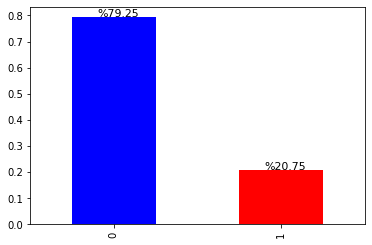

In [32]:
ax = df['RainTomorrow'].value_counts(normalize=True).plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [33]:
# # pip install imblearn
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE

In [34]:
# oversmote = SMOTE()
# X_train, y_train= oversmote.fit_resample(X_train, y_train)

In [35]:
# ax = y_train.value_counts().plot.bar(color=["blue", "red"])
# def labels(ax):
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height()}", (p.get_x() + 0.15, p.get_height()+200),size=8)
# labels(ax)
# plt.show()

In [36]:
# X_train.shape

### Data Scaling

In [198]:
# creating a minmax scaler
sc = MinMaxScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [199]:
cv_acc_train = {}
cv_acc_test = {}
cv_TPR = {}
cv_FPR = {}
cv_AUC = {}
f1 = {}
recall = {}

In [200]:
def plot_result(model, name:str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')  
    cv_acc_train[name] = round(scores_train.mean(), 4)  # balanced accuracy
    cv_acc_test[name] = round(scores_test.mean(), 4)  # balanced accuracy
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())  # recall (Max)
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())  # fallout (Min)
    f1[name] = f1_score(y_test, y_pred, average='macro')
    recall[name] = recall_score(y_test, y_pred, average='macro')
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

In [201]:
def plot_feature_importances(model):
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:10]

    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.show()

    print(f"Top 10 Feature Importance for {str(model).split('(')[0]}\n\n",feature_imp[:10],sep='')

### 1-Logistic regression

In [202]:
from sklearn.linear_model import LogisticRegression

Average Balanced Accuracy (CV=10), Test Set: 0.723257162407276
Average Balanced Accuracy (CV=10), Training Set:  0.7291528139290615
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10061
           1       0.73      0.52      0.61      2634

    accuracy                           0.86     12695
   macro avg       0.80      0.73      0.76     12695
weighted avg       0.85      0.86      0.85     12695



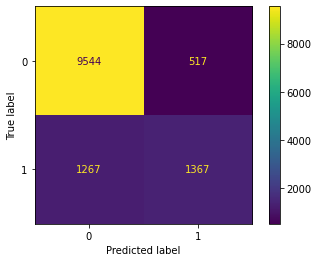

In [203]:
lr = LogisticRegression()
plot_result(lr, "lr")

### 2-Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB

Average Balanced Accuracy (CV=10), Test Set: 0.7170268971798459
Average Balanced Accuracy (CV=10), Training Set:  0.7203528780196033
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     10061
           1       0.41      0.72      0.52      2634

    accuracy                           0.73     12695
   macro avg       0.66      0.73      0.67     12695
weighted avg       0.81      0.73      0.75     12695



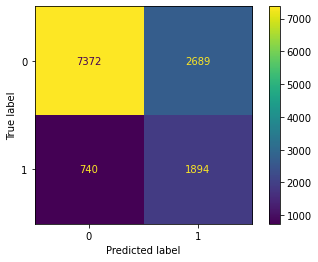

In [205]:
nb = GaussianNB()
plot_result(nb, "nb")

### 3-K-Nearest Neighbor (KNN)

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
# knn = KNeighborsClassifier()
# plot_result(knn, "knn")

### 4-Support Vector Mechanism (SVM)

In [208]:
# svc = SVC(probability=True)  # default values
# plot_result(svc, "svc")

### 5-Decision Tree Classifier

In [209]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Average Balanced Accuracy (CV=10), Test Set: 0.6826596636628792
Average Balanced Accuracy (CV=10), Training Set:  0.6962108329575073
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10061
           1       0.51      0.53      0.52      2634

    accuracy                           0.80     12695
   macro avg       0.69      0.70      0.69     12695
weighted avg       0.80      0.80      0.80     12695



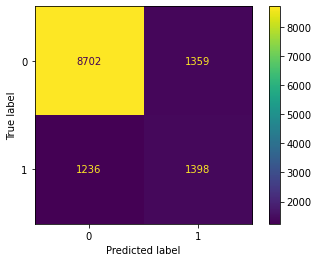

In [210]:
dtc = DecisionTreeClassifier()
plot_result(dtc, "dtc")

### 6-NearestCentroid

In [211]:
from sklearn.neighbors import NearestCentroid

Average Balanced Accuracy (CV=10), Test Set: 0.7533467727417287
Average Balanced Accuracy (CV=10), Training Set:  0.7457356920391829
              precision    recall  f1-score   support

           0       0.92      0.73      0.82     10061
           1       0.43      0.77      0.55      2634

    accuracy                           0.74     12695
   macro avg       0.68      0.75      0.69     12695
weighted avg       0.82      0.74      0.76     12695



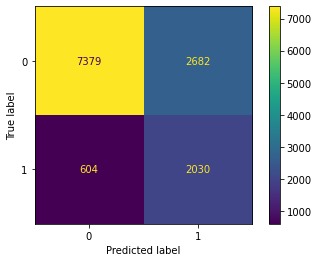

In [212]:
nc = NearestCentroid()
plot_result(nc, "nc")

### 7-Random Forest Classifier

In [213]:
from sklearn.ensemble import RandomForestClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.7130020683641233
Average Balanced Accuracy (CV=10), Training Set:  0.7156417307093995
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     10061
           1       0.78      0.48      0.60      2634

    accuracy                           0.86     12695
   macro avg       0.83      0.72      0.76     12695
weighted avg       0.86      0.86      0.85     12695



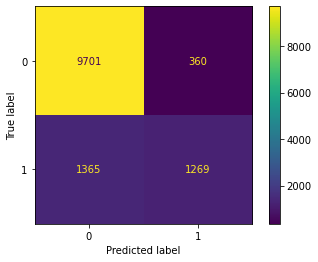

In [214]:
rfc = RandomForestClassifier()
plot_result(rfc, "rfc")

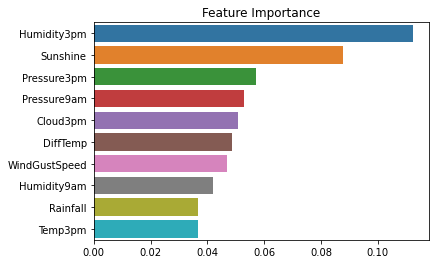

Top 10 Feature Importance for RandomForestClassifier

Humidity3pm     0.11
Sunshine        0.09
Pressure3pm     0.06
Pressure9am     0.05
Cloud3pm        0.05
DiffTemp        0.05
WindGustSpeed   0.05
Humidity9am     0.04
Rainfall        0.04
Temp3pm         0.04
dtype: float64


In [215]:
plot_feature_importances(rfc)

### 8-Gradient Boosting Classifier

In [216]:
from sklearn.ensemble import GradientBoostingClassifier

In [217]:
# gbc = GradientBoostingClassifier(random_state=42)
# plot_result(gbc, "gbc")

In [218]:
# plot_feature_importances(gbc)

### 9-XGBOOST

In [219]:
from xgboost import XGBClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.7454420272743766
Average Balanced Accuracy (CV=10), Training Set:  0.7463361997704293
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10061
           1       0.74      0.55      0.63      2634

    accuracy                           0.87     12695
   macro avg       0.81      0.75      0.78     12695
weighted avg       0.86      0.87      0.86     12695



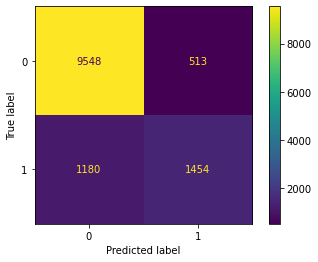

In [221]:
xgb = XGBClassifier(eval_metric = "logloss")
plot_result(xgb, "xgb")

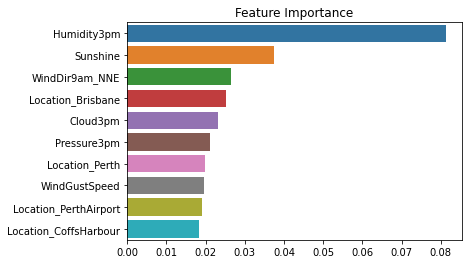

Top 10 Feature Importance for XGBClassifier

Humidity3pm             0.08
Sunshine                0.04
WindDir9am_NNE          0.03
Location_Brisbane       0.03
Cloud3pm                0.02
Pressure3pm             0.02
Location_Perth          0.02
WindGustSpeed           0.02
Location_PerthAirport   0.02
Location_CoffsHarbour   0.02
dtype: float32


In [222]:
plot_feature_importances(xgb)

### 10-LightGBM

In [223]:
from lightgbm import LGBMClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.7415804993301786
Average Balanced Accuracy (CV=10), Training Set:  0.7416490974176952
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10061
           1       0.75      0.54      0.62      2634

    accuracy                           0.87     12695
   macro avg       0.82      0.74      0.77     12695
weighted avg       0.86      0.87      0.86     12695



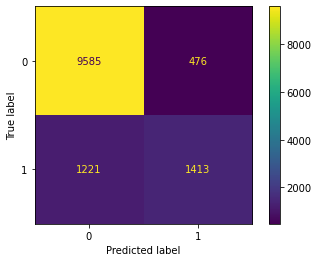

In [224]:
lgb = LGBMClassifier()
plot_result(lgb, "lgb")

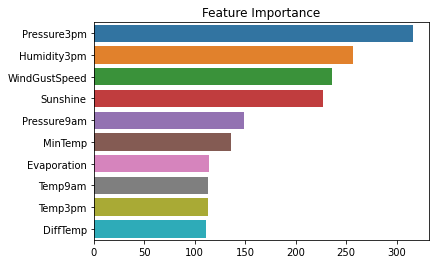

Top 10 Feature Importance for LGBMClassifier

Pressure3pm      316
Humidity3pm      257
WindGustSpeed    236
Sunshine         227
Pressure9am      149
MinTemp          136
Evaporation      114
Temp9am          113
Temp3pm          113
DiffTemp         111
dtype: int32


In [225]:
plot_feature_importances(lgb)

In [226]:

def AUC(cv_AUC, X_test=X_test):
    dtc_auc= roc_auc_score(y_test,dtc.predict(X_test)) #Decision Tree Classifier
    lr_auc= roc_auc_score(y_test, lr.decision_function(X_test))#logistic regression
#     svc_auc= roc_auc_score(y_test, svc.decision_function(X_test))#Support Vector Classifier
    nc_auc= roc_auc_score(y_test, nc.predict(X_test))#Nearest Centroid Classifier
    rfc_auc= roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])#Randomforest Classifier
#     gbc_auc= roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])#GradientBoosting Classifier
    nb_auc= roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])#Naive Bayes Classifier
#     knn_auc= roc_auc_score(y_test, knn.predict(X_test))#KNeighbors Classifier
    xgb_auc= roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier
    lgb_auc= roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1])#LightGBM Classifier

    cv_AUC={'dtc': dtc_auc,
           'lr': lr_auc,
#            'svc':svc_auc,
           'nc':nc_auc,
           'rfc':rfc_auc,
#            'gbc':gbc_auc,
           'nb':nb_auc,
#            'knn':knn_auc,
           'xgb':xgb_auc,
           'lgb':lgb_auc}
    
    return cv_AUC

In [227]:
cv_AUC = AUC(cv_AUC)
df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                             'bal_acc_train':list(cv_acc_train.values()),
                             'bal_acc_test': list(cv_acc_test.values()), 
                             'recall_1': list(cv_TPR.values()), 
                             'recall_macro': list(recall.values()), 
                             'f1_macro': list(f1.values()), 
                             'fallout':list(cv_FPR.values()),
                             'AUC': list(cv_AUC.values())}).round(2)
df_eval

,model,bal_acc_train,bal_acc_test,recall_1,recall_macro,f1_macro,fallout,AUC
0,lr,0.73,0.72,0.52,0.73,0.76,0.05,0.70
1,nb,0.72,0.72,0.72,0.73,0.67,0.27,0.89
2,dtc,0.70,0.68,0.53,0.70,0.69,0.14,0.75
3,nc,0.75,0.75,0.77,0.75,0.69,0.27,0.89
4,rfc,0.72,0.71,0.48,0.72,0.76,0.04,0.80
5,xgb,0.75,0.75,0.55,0.75,0.78,0.05,0.89
6,lgb,0.74,0.74,0.54,0.74,0.77,0.05,0.90


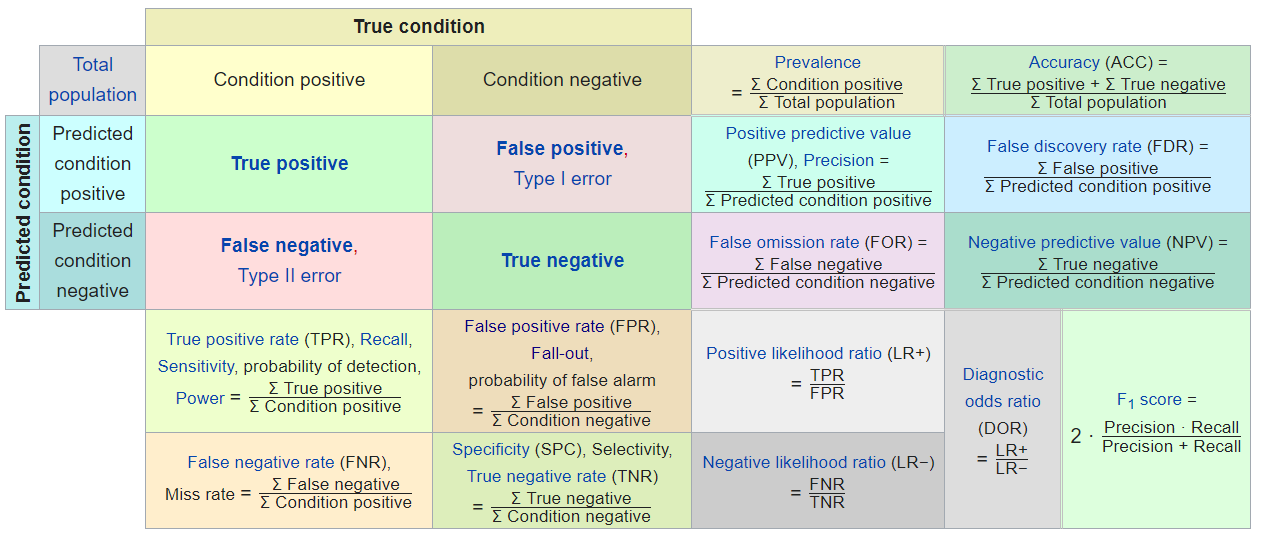

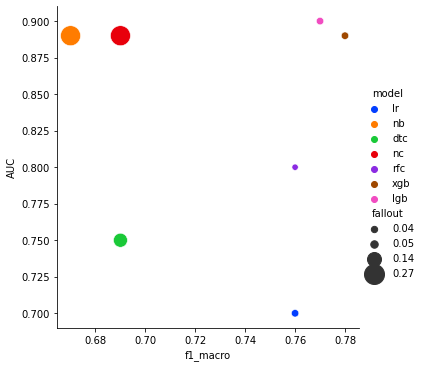

In [230]:
sns.relplot(x="f1_macro", y="AUC", hue="model", size="fallout", 
            sizes=(40, 400), alpha=1, palette="bright", height=5, legend='full', data=df_eval);

### Lazy Predict

In [ ]:
from lazypredict.Supervised import LazyClassifier
df=pd.read_csv('weather_cleandata.csv',index_col=[0])
df_5000 = df.copy()
y = df_5000['RainTomorrow']
X = df_5000.drop('RainTomorrow', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

### Tunning with XGBOOST

In [232]:
cv_acc_train = {}
cv_acc_test = {}
cv_TPR = {}
cv_FPR = {}
cv_AUC = {}
f1 = {}
recall = {}

In [233]:
from xgboost import XGBClassifier

params = {"n_estimators": [200, 300],
          "subsample":[0.5,1],
          "max_depth":[15,25],
          "learning_rate":[0.01,0.1,0.3]}


In [234]:
# xgb = GridSearchCV(xgb, params, cv = 5, 
#                    n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [235]:
# xgb.best_params_

In [236]:
xgb= XGBClassifier(learning_rate= 0.3, 
                    max_depth= 15, 
                    n_estimators= 200, 
                    subsample= 1).fit(X_train, y_train)

# confusion_matrix(y_test, xgb.predict(X_test))

Average Balanced Accuracy (CV=10), Test Set: 0.7424403093911313
Average Balanced Accuracy (CV=10), Training Set:  0.7493809087616169
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10061
           1       0.75      0.56      0.64      2634

    accuracy                           0.87     12695
   macro avg       0.82      0.76      0.78     12695
weighted avg       0.86      0.87      0.86     12695



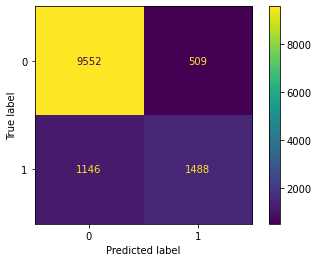

In [237]:
plot_result(xgb, "xgb")

### Tunning with LightGBM

In [238]:
from lightgbm import LGBMClassifier

params = {"n_estimators": [200, 300],
          "subsample":[0.5,1],
          "max_depth":[15,25],
          "learning_rate":[0.01,0.1,0.3]}

In [239]:
# lgb = GridSearchCV(LGBMClassifier(), params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [240]:
# lgb.best_params_

In [241]:
lgb= LGBMClassifier(learning_rate= 0.1, 
                    max_depth= 18, 
                    n_estimators= 275, 
                    subsample= 0.5).fit(X_train, y_train)

# confusion_matrix(y_test, lgb.predict(X_test))

Average Balanced Accuracy (CV=10), Test Set: 0.7447265732306242
Average Balanced Accuracy (CV=10), Training Set:  0.7487575363840625
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10061
           1       0.75      0.55      0.64      2634

    accuracy                           0.87     12695
   macro avg       0.82      0.75      0.78     12695
weighted avg       0.86      0.87      0.86     12695



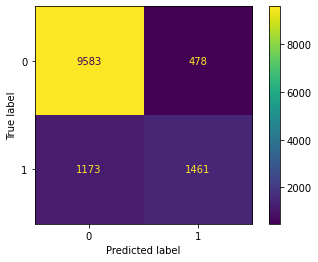

In [242]:
plot_result(lgb, "lgb")

In [245]:
def AUC(cv_AUC, X_test=X_test):
    xgb_auc= roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier
    lgb_auc= roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1])#LightGBM Classifier  
    
    cv_AUC={'xgb':xgb_auc,
            'lgb':lgb_auc}
    
    return cv_AUC

cv_AUC = AUC(cv_AUC)
df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                             'bal_acc_train':list(cv_acc_train.values()),
                             'bal_acc_test': list(cv_acc_test.values()), 
                             'recall_1': list(cv_TPR.values()), 
                             'recall_macro': list(recall.values()), 
                             'f1_macro': list(f1.values()), 
                             'fallout':list(cv_FPR.values()),
                             'AUC': list(cv_AUC.values())}).round(2)
df_eval

,model,bal_acc_train,bal_acc_test,recall_1,recall_macro,f1_macro,fallout,AUC
0,xgb,0.75,0.74,0.56,0.76,0.78,0.05,0.90
1,lgb,0.75,0.74,0.55,0.75,0.78,0.05,0.90


>>**Best Model is XGBOOST**

### Saving Model

In [267]:
xgb= XGBClassifier(learning_rate= 0.3, 
                    max_depth= 15, 
                    n_estimators= 200, 
                    subsample= 1).fit(X, y)

In [276]:
y_pred = xgb.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40242
           1       1.00      1.00      1.00     10536

    accuracy                           1.00     50778
   macro avg       1.00      1.00      1.00     50778
weighted avg       1.00      1.00      1.00     50778



In [294]:
import pickle
pickle.dump(xgb,open("model.pkl","wb"))
xgb_model = pickle.load(open("model.pkl","rb"))

In [319]:
my_dict = {'MinTemp': 21.9,
             'MaxTemp': 38.4,
             'Rainfall': 0.0,
             'Evaporation': 11.4,
             'Sunshine': 12.2,
             'WindGustSpeed': 31.0,
             'WindSpeed9am': 6.0,
             'WindSpeed3pm': 6.0,
             'Humidity9am': 37.0,
             'Humidity3pm': 22.0,
             'Pressure9am': 1012.7,
             'Pressure3pm': 1009.1,
             'Cloud9am': 1.0,
             'Cloud3pm': 5.0,
             'Temp9am': 29.1,
             'Temp3pm': 35.6,
             'RainToday': 0,
             'Month': 1,
             'DiffTemp': 16.5,
             'Location':'Cobar',
             'WindGustDir':'WNW',
             'WindDir9am':'WNW',
             'WindDir3pm':'WSW',
#              'RainTomorrow':0,
             }

In [320]:
X = pd.DataFrame([my_dict])
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,Location,WindGustDir,WindDir9am,WindDir3pm
0,21.90,38.40,0.00,11.40,12.20,31.00,6.00,6.00,37.00,22.00,...,5.00,29.10,35.60,0,1,16.50,Cobar,WNW,WNW,WSW


In [321]:
all_columns=df.drop('RainTomorrow',axis=1).columns
all_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Month', 'DiffTemp',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',


In [322]:
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,21.90,38.40,0.00,11.40,12.20,31.00,6.00,6.00,37.00,22.00,...,0,0,0,0,0,0,0,0,0,1


### Make a Prediction

In [323]:
prediction_XGB = xgb_model.predict(X)
print("RainTomorrow : ",'Yes' if prediction_XGB[0] else 'No')

RainTomorrow :  No


In [324]:
prediction_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Rain is %{round(prediction_XGB[0][1]*100,1)}')

The Probability of the Rain is %0.0


In [331]:
my_dict = {'MinTemp': 10.5,
             'MaxTemp': 20.0,
             'Rainfall': 2.8,
             'Evaporation': 4.6,
             'Sunshine': 7.3,
             'WindGustSpeed': 67.0,
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 28.0,
             'Humidity9am': 83.0,
             'Humidity3pm': 10.0,
             'Pressure9am': 1011.7,
             'Pressure3pm': 1007.0,
             'Cloud9am': 5.0,
             'Cloud3pm': 6.0,
             'Temp9am': 15.4,
             'Temp3pm': 19.1,
             'RainToday': 1,
             'Month': 8,
             'DiffTemp': 9.5,
             'Location':'Perth',
             'WindGustDir':'NNW',
             'WindDir9am':'N',
             'WindDir3pm':'NW',
#              'RainTomorrow':1,
             }

X = pd.DataFrame([my_dict])
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
prediction_XGB = xgb_model.predict(X)
print("RainTomorrow : ",'Yes' if prediction_XGB[0] else 'No')

RainTomorrow :  Yes


In [332]:
prediction_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Rain is %{round(prediction_XGB[0][1]*100,1)}')

The Probability of the Rain is %89.3


In [345]:
pip freeze

absl-py==0.12.0
altair==4.1.0
altgraph==0.17
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anyio @ file:///C:/ci/anyio_1617783481233/work/dist
app==0.0.1
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
astor==0.8.1
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
Automat==20.2.0
autoviz==0.0.81
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1617198481742/work
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
base58==2.1.0
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bidict==0.21.2
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
blinker==1.4
Brotli==1.0.9
brotlip